In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:\intern\Adidas_US_Sales_Analysis_PowerBI\Adidas US Sales Datasets.xlsx", skiprows=4, usecols="B:N")

In [3]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

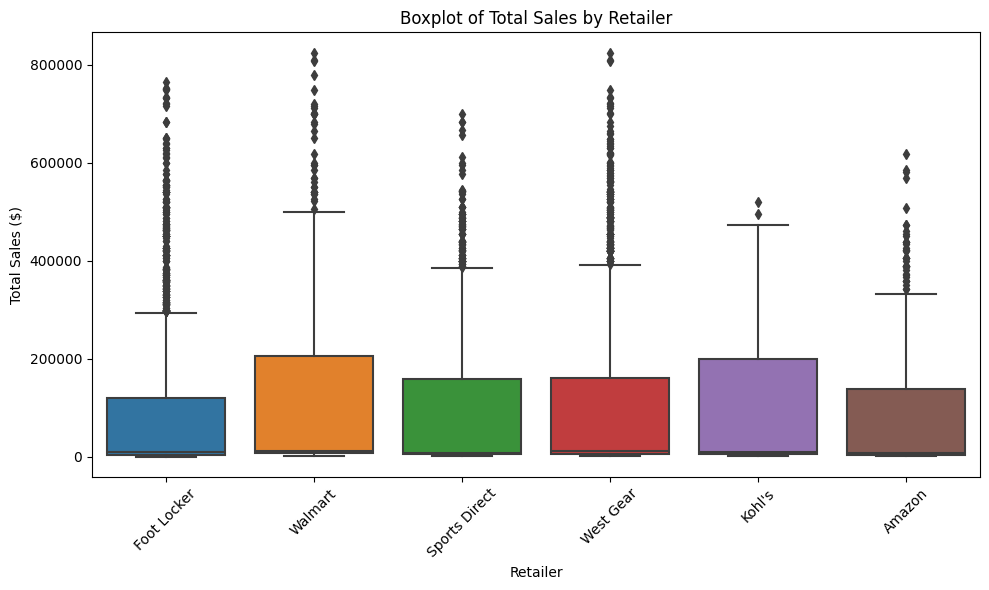

In [4]:
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Retailer', y='Total Sales', data=df)
plt.title('Boxplot of Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.preprocessing import LabelEncoder, StandardScaler

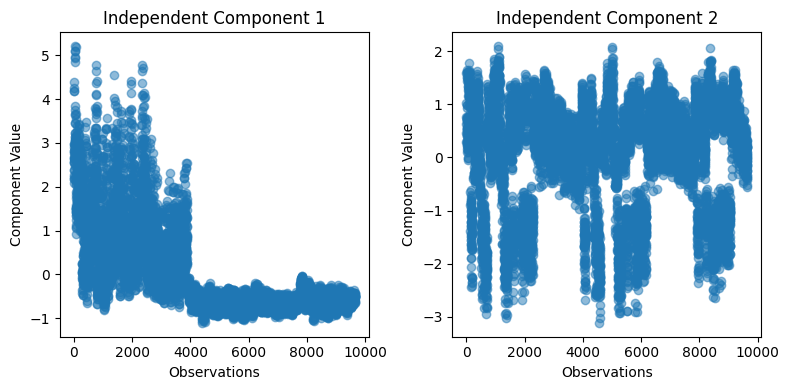

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)

num_components = min(numerical_columns.shape[1], 2)  
ica = FastICA(n_components=num_components, random_state=42)
ica_components = ica.fit_transform(scaled_data)

ica_df = pd.DataFrame(ica_components, columns=[f'Independent Component {i+1}' for i in range(num_components)])

plt.figure(figsize=(8, 4))
for i, col in enumerate(ica_df.columns):
    plt.subplot(1, num_components, i + 1)
    plt.scatter(range(len(ica_df)), ica_df[col], marker='o', alpha=0.5)
    plt.title(col)
    plt.xlabel('Observations')
    plt.ylabel('Component Value')
plt.tight_layout()
plt.show()


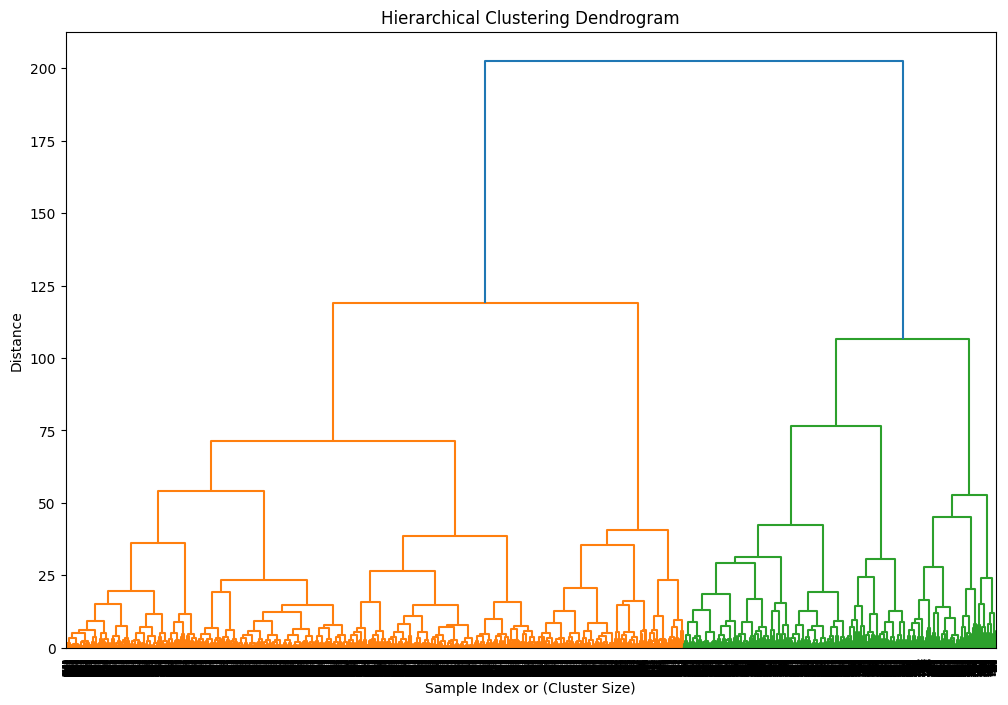

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


df['Price per Unit'] = df['Price per Unit'].replace('[\$,]', '', regex=True).astype(float)
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype(float)
df['Operating Profit'] = df['Operating Profit'].replace('[\$,]', '', regex=True).astype(float)

numerical_columns = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           labels=np.arange(len(df)), 
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


In [8]:
import numpy as np

class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.player_turn = 1

    def is_valid_move(self, x, y):
        return self.board[x, y] == 0

    def make_move(self, x, y, player):
        if self.is_valid_move(x, y):
            self.board[x, y] = player
            self.player_turn = -self.player_turn
            return True
        return False

    def check_winner(self):
        # Check horizontal, vertical, and diagonal conditions
        for i in range(3):
            if np.all(self.board[i, :] == self.board[i, 0]) and self.board[i, 0] != 0:
                return self.board[i, 0]
            if np.all(self.board[:, i] == self.board[0, i]) and self.board[0, i] != 0:
                return self.board[0, i]
        if (self.board[0, 0] == self.board[1, 1] == self.board[2, 2] != 0) or (
                self.board[0, 2] == self.board[1, 1] == self.board[2, 0] != 0):
            return self.board[1, 1]
        if np.all(self.board != 0):
            return 0  # Draw
        return None  # Continue playing

    def reset(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.player_turn = 1

    def print_board(self):
        print("  0 1 2")
        for i, row in enumerate(self.board):
            print(i, " ".join(map(lambda x: "X" if x == 1 else "O" if x == -1 else "-", row)))


# Function to play a game
def play_game():
    game = TicTacToe()
    print("Starting Tic-Tac-Toe game!")
    print("Player 1: X, Player 2: O")
    print("The board is empty. Let's start!\n")

    while True:
        game.print_board()
        player = game.player_turn
        print(f"\nPlayer {player}'s turn.")
        move = input("Enter your move (row, column), e.g., 1,1 for the center: ")
        try:
            x, y = map(int, move.split(","))
            if 0 <= x <= 2 and 0 <= y <= 2:
                if game.make_move(x, y, player):
                    print(f"Player {player} moved to position ({x},{y}).")
                    winner = game.check_winner()
                    if winner is not None:
                        game.print_board()
                        if winner == 0:
                            print("It's a draw!")
                        else:
                            print(f"Player {winner} wins!")
                        break
                else:
                    print("Invalid move! Try again.\n")
            else:
                print("Invalid input! Please enter coordinates within the range of 0 to 2.\n")
        except ValueError:
            print("Invalid input! Please enter two integers separated by a comma.\n")

# Play the game
play_game()


Starting Tic-Tac-Toe game!
Player 1: X, Player 2: O
The board is empty. Let's start!

  0 1 2
0 - - -
1 - - -
2 - - -

Player 1's turn.
Enter your move (row, column), e.g., 1,1 for the center: 1,1
Player 1 moved to position (1,1).
  0 1 2
0 - - -
1 - X -
2 - - -

Player -1's turn.
Enter your move (row, column), e.g., 1,1 for the center: 0,1
Player -1 moved to position (0,1).
  0 1 2
0 - O -
1 - X -
2 - - -

Player 1's turn.
Enter your move (row, column), e.g., 1,1 for the center: ,2
Invalid input! Please enter two integers separated by a comma.

  0 1 2
0 - O -
1 - X -
2 - - -

Player 1's turn.
Enter your move (row, column), e.g., 1,1 for the center: 1,2
Player 1 moved to position (1,2).
  0 1 2
0 - O -
1 - X X
2 - - -

Player -1's turn.
Enter your move (row, column), e.g., 1,1 for the center: 0,0
Player -1 moved to position (0,0).
  0 1 2
0 O O -
1 - X X
2 - - -

Player 1's turn.
Enter your move (row, column), e.g., 1,1 for the center: 1,0
Player 1 moved to position (1,0).
  0 1 2
0 O